### Exercise 1
Create at least two different classification models to try to best predict the classes.

### EXCERCISES OF ALGORITHMIC CLASSIFICATION

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [182]:
df = pd.read_csv('wineData.txt', sep = ',')
df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [183]:
df.columns=['class', 'Alcohol', "Malic acid", 'Ash', 'Alcalinity of ash', "Magnesium", 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', "Hue", 'OD280/OD315 of diluted wines','Proline']

In [184]:
df

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#### RUN DESCRIPTIVE ANALYSIS OF DATA 

In [185]:
df.describe()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [186]:
df.isnull().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

Text(0.5, 1.0, 'DISTRIBUTION OF THE TARGET VARIABLE')

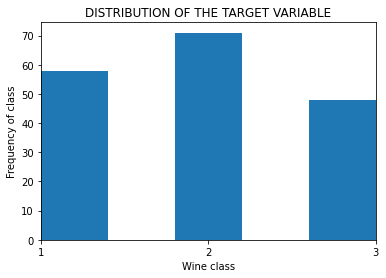

In [187]:
#Distribution of the target variable
plt.hist(df['class'], bins = 5, align='mid')
#plt.xticks(np.arange(1, 3, step= 1))
plt.xticks(range(4))
plt.xlim([1,3])
plt.ylabel('Frequency of class')
plt.xlabel('Wine class')
plt.title('DISTRIBUTION OF THE TARGET VARIABLE')

In [188]:
from itertools import count


class3 =df['class']==3
print(class3.value_counts().count)
class2 = df['class']==2
print(class2.value_counts().count)
class1 = df['class']==1
print(class1.value_counts().count)
"""for i in range(3):
    print(class.value_counts().count)"""

<bound method Series.count of False    129
True      48
Name: class, dtype: int64>
<bound method Series.count of False    106
True      71
Name: class, dtype: int64>
<bound method Series.count of False    119
True      58
Name: class, dtype: int64>


'for i in range(3):\n    print(class.value_counts().count)'

The distribution of target variables shows there are greater examples of the 2nd wine class over the other ones. This might represent a bias on the classification model, making it more likely to classify examples as the second wine class. For that we resample the available data. 

### Undersampling both classes 1 and 2

In [189]:
shuffle_df = df.sample(frac= 1, random_state=5)
shuffle_df.shape
#All classes should be at 48, since the smallest class(3) has 48 data points.
#Randomly select 48 observations from class 1
df_class1 = shuffle_df.loc[shuffle_df['class']==1].sample(n=48,random_state=3)

#Randomly select 48 observations from class 2
df_class2= shuffle_df.loc[shuffle_df['class']==2].sample(n=48, random_state=3)

normalized_df = pd.concat([df_class1,df_class2,df[class3]])

normalized_df.shape



(144, 14)

Text(0.5, 1.0, 'NORMAL DISTRIBUTION OF THE TARGET VARIABLE')

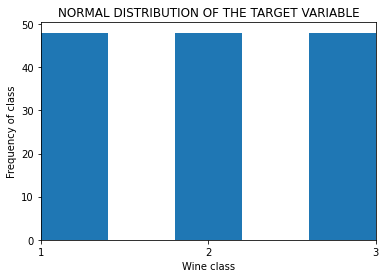

In [190]:
#Distribution of the target variable
plt.hist(normalized_df['class'], bins = 5, align='mid')
#plt.xticks(np.arange(1, 3, step= 1))
plt.xticks(range(4))
plt.xlim([1,3])
plt.ylabel('Frequency of class')
plt.xlabel('Wine class')
plt.title('NORMAL DISTRIBUTION OF THE TARGET VARIABLE')

In [191]:
df.columns

Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

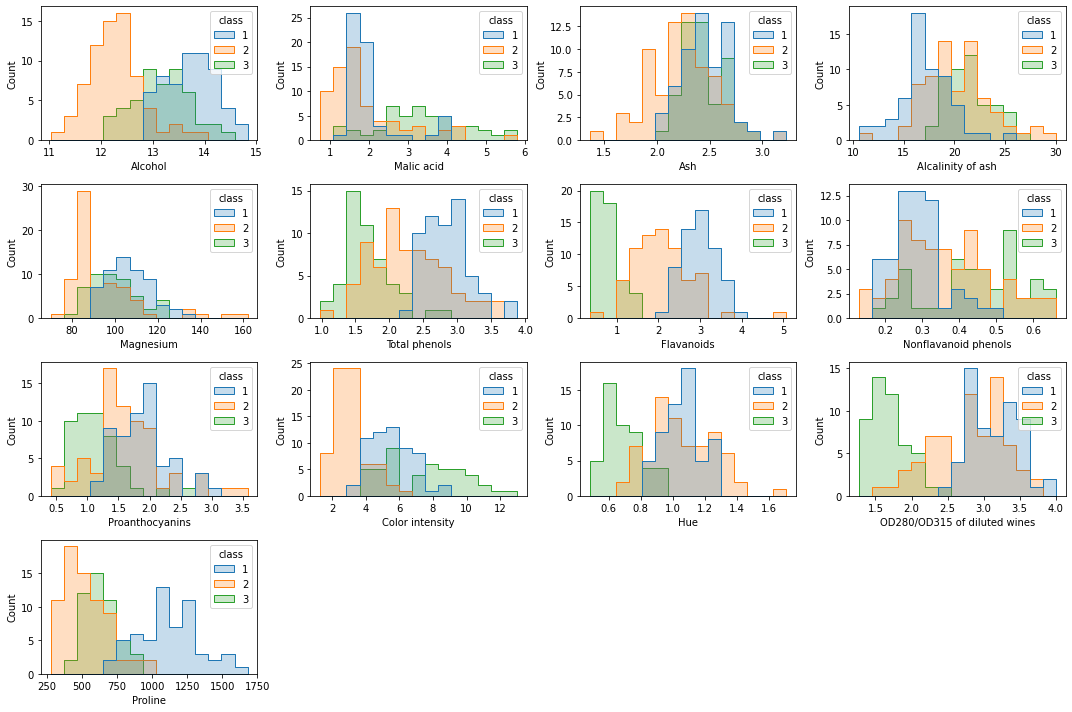

In [192]:
plt.figure(figsize=(15,10))
for i in range(13):
   ax =plt.subplot(4,4,i+1)
   sns.histplot(data = df, x = df.columns[i+1], hue = 'class', bins = 15, element="step",palette= 'tab10', ax= ax)
plt.tight_layout()

The previous graphs show how the classes(1,2,3)are distributed in each colum from the data set. The ones that better show a distinctive distribution for each class will be the ones used as predictors(xamples of these are: Alcohol, Flavanoids and Color intensity)as well as those columns in which one of the classes is distributed differently than the others. Examples of these are: OD280/OD315 of diluted wines, Proline and Hue.

In [193]:
#We stablish features(predictors) and target(class of wine) to feed the model
target = df['class']
features = df[['Alcohol','Flavanoids', 'Color intensity','OD280/OD315 of diluted wines','Proline', 'Hue']]



In [194]:
#Divide the dataset into training & testing sets with 33% of the datasets being allocated to testing set.
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.33)

In [195]:
#check the shape of the training and testing sets
print(f'Shape of the feature classes{X_train.shape}and the target class {y_train.shape} in the training set')
print(f'Shape of the feature classes{X_test.shape}and the target class{y_test.shape}in the testing set')

Shape of the feature classes(118, 6)and the target class (118,) in the training set
Shape of the feature classes(59, 6)and the target class(59,)in the testing set


### USE RANDOM FOREST AS FIRST ALGORITHM TO CLASSIFY THE WINE TYPE

In [196]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [197]:
#Predict wine class from the test data
predicted_class = random_forest.predict(X_test)

### USE KNN AS SECOND ALGORITHM TO CLASSIFY THE WINE TYPE

In [198]:
from cmath import sqrt

#Decide K
total_sample = y_test.value_counts().sum()
sqrt(total_sample)


(7.681145747868608+0j)

In [199]:
knn = KNeighborsClassifier(n_neighbors= 9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [200]:
#Predict wine class from the test data
predicted_class_knn = knn.predict(X_test)

### Exercise 2
Compare classification models using accuracy, a confidence matrix, and other more advanced metrics.


### ACCURACY WHEN USING RANDOM FOREST

In [201]:
# Check for performance using random forest
accuracy = random_forest.score(X_test, y_test)
print(accuracy)

 

1.0


### ACCURACY WHEN USING KNN

In [202]:
accuracy_knn = knn.score(X_test,y_test)
print(accuracy_knn)

0.6949152542372882


### CONFUSION MATRIX WHEN USING RF

In [203]:
values_rf_cm = confusion_matrix(y_test, predicted_class)

([<matplotlib.axis.YTick at 0x1e6dffba460>,
 [Text(0, 0, '1'), Text(0, 1, '2'), Text(0, 2, '3')])

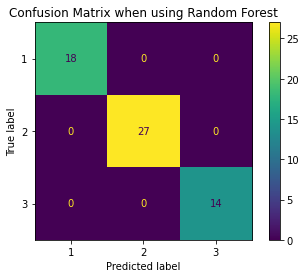

In [204]:
display_rf_confusion_matrix = ConfusionMatrixDisplay(values_rf_cm)
display_rf_confusion_matrix.plot()
plt.title('Confusion Matrix when using Random Forest')
plt.xticks([0,1,2], [1,2,3])
plt.yticks([0,1,2], [1,2,3])

### CONFUSION MATRIX WHEN USING KNN

The previous graphs show how the classes(1,2,3)are distributed in each colum from the data set. The ones that better show a distinctive distribution for each class will be the ones used as predictors(xamples of these are: Alcohol, Flavanoids and Color intensity)as well as those columns in which one of the classes is distributed differently than the others. Examples of these are: OD280/OD315 of diluted wines, Proline and Hue.

In [205]:
values_knn_cm = confusion_matrix(y_test, predicted_class_knn)

([<matplotlib.axis.YTick at 0x1e6dfc9c160>,
 [Text(0, 0, '1'), Text(0, 1, '2'), Text(0, 2, '3')])

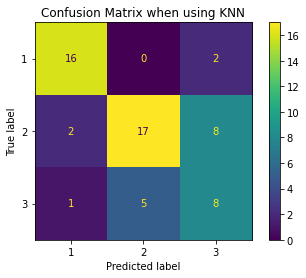

In [206]:
display_confusion_matrix_knn = ConfusionMatrixDisplay(values_knn_cm)
display_confusion_matrix_knn.plot()
plt.title('Confusion Matrix when using KNN')
plt.xticks([0,1,2], [1,2,3])
plt.yticks([0,1,2], [1,2,3])

From the performance metrics it can be seen that the KNN algorithm performs poorly on the classification task, compared to the performance of RF.
It is likely, that the reason why the algorithm is performing this way is because the training and testing sets were not scaled before predicting. 
Below, we will correct this, with the aim of improving the performance of the KNN algorithm.


### Exercise 3
Train them using the different parameters they support in order to improve their prediction.

In [208]:
#Scale the data that will be used in the training and testing set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [209]:
#Create new classifier object to use and specify parameters on how to measure distance between points
upgrade_knn = KNeighborsClassifier(n_neighbors= 7, p=2, metric = 'euclidean')

In [210]:
#Train the model with the scaled data
upgrade_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [211]:
#Predict the type of wine using the test data
knn_prediction = upgrade_knn.predict(X_test)

In [220]:
accuracy_scaled_knn = upgrade_knn.score(X_test, y_test)
print(accuracy_scaled_knn)

0.9661016949152542


([<matplotlib.axis.YTick at 0x1e6de1bf370>,
 [Text(0, 0, '1'), Text(0, 1, '2'), Text(0, 2, '3')])

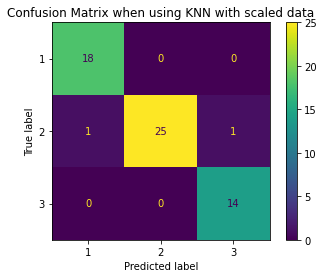

In [216]:
#Confusion Matrix using the KNN
cm = confusion_matrix(y_test,knn_prediction)
show_cm = ConfusionMatrixDisplay(cm)
show_cm.plot()
plt.title('Confusion Matrix when using KNN with scaled data')
plt.xticks([0,1,2], [1,2,3])
plt.yticks([0,1,2], [1,2,3])

